## Clustering Exercise: Customer Segmentation in E-commerce

### Overview
<a href="https://archive.ics.uci.edu/ml/datasets/online+retail">Online retail is a transnational data set</a> which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

| Column Name     | Description                                                         |
| --------------- | ------------------------------------------------------------------- |
| **InvoiceNo**   | Unique identifier for each transaction (a 6-digit integral number). |
| **StockCode**   | Product (item) code.                                                |
| **Description** | Product (item) name.                                                |
| **Quantity**    | The number of units of the product purchased per transaction.       |
| **InvoiceDate** | Date and time when the transaction occurred.                        |
| **UnitPrice**   | Price per unit of the product (in GBP).                             |
| **CustomerID**  | Unique identifier for each customer.                                |
| **Country**     | The name of the country where the customer resides.                 |


### Goal
We aim to develop suitable and efficient marketing strategy for each segement of the Customers. Therefore, clustering is required to find meaningful customers segments

### Approach
Apply K-means clustering to to segment customers based on existing behavior to predict how a new customer is likely to act in the future.  That should ensure the company can target its customers efficiently with a corresponding marketing strategy.

We will adopt the RFM analysis by calculating the three RFM metrics:
- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed).

We will use the RFM new variables as input for the clustering

Follow the Jupyter notebook below and answer the tasks marked as ✅ Task for Students.

<a id="1"></a> <br>
### 1. Import the basic packages and set the random seed

In [1]:
# import required libraries for dataframe and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
kmeans = KMeans

In [4]:
# to ensure reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

### 2. Load and Preview the Data

Start by loading the dataset and inspecting the first few rows.

In [5]:
# Load the dataset
data=pd.read_csv('./OnlineRetail.csv', encoding= 'cp1252' , header=0)

# Preview the dataset
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
# check column types and existance of NaNs
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  float64
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(3), object(5)
memory usage: 27.3+ MB


In [7]:
# check the distribution of the numerical features
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


<a id="2"></a> <br>
### 3. Data Cleansing

✅ Task for Students: Drop rows with missing values.

In [17]:
# Drop all rows with missing values: this will drop all rows where customer ID is missing, notice that this cannot be imputed
data.dropna(inplace=True)

✅ Task for Students: Remove any entries where `Quantity` or `UnitPrice` is zero or negative, as these entries likely represent errors.

In [15]:
data["Quantity"] =np.where(data['Quantity']<=0, np.nan,data['Quantity'] )
data["UnitPrice"] =np.where(data['UnitPrice']<=0, np.nan,data['UnitPrice'] )

In [16]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,531285.000000,539392.000000,406829.000000
mean,10.655262,4.673648,15287.690570
std,156.830323,94.614722,1713.600303
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
# Remove rows with Quantity and UnitPrice <= 0
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

In [11]:
# Confirm cleaned data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


<a id="3"></a> <br>
### 4. Feature Engineering

✅ Task for Students:
For customer segmentation, it is often need to conduct an RFM analysis by calculating three customers metrics:
- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed).

Your task is to compute these three features for each customer.

In [19]:
from datetime import datetime

# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Set the reference date (one day after the last transaction)
reference_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)

In [20]:
#Total amount of transactions (revenue contributed)
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [21]:
# Compute RFM metrics per customer, you can break this code down to several lines if you feel it is too hard, as in the cell below
rfm = (
    data.groupby('CustomerID')
        .agg(
            Recency=('InvoiceDate', lambda x: (reference_date - x.max()).days),
            Frequency=('InvoiceNo', 'nunique'),
            Monetary=('TotalPrice', 'sum')
        )
        .reset_index()
)

In [14]:
# Step 1: Calculate Recency
recency = data.groupby('CustomerID')['InvoiceDate'].max()
recency = (reference_date - recency).dt.days
recency = recency.reset_index()
recency.columns = ['CustomerID', 'Recency']

# Step 2: Calculate Frequency (number of unique invoices)
frequency = data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.columns = ['CustomerID', 'Frequency']

# Step 3: Calculate Monetary value (total purchase amount)
monetary = data.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary.columns = ['CustomerID', 'Monetary']

# Step 4: Merge all three RFM components into one DataFrame
rfm = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')

In [22]:
# Preview the RFM data
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


### 5. Data Exploration and Visualization

Use visualizations to understand the distributions of **Recency**, **Frequency**, and **Monetary** values.

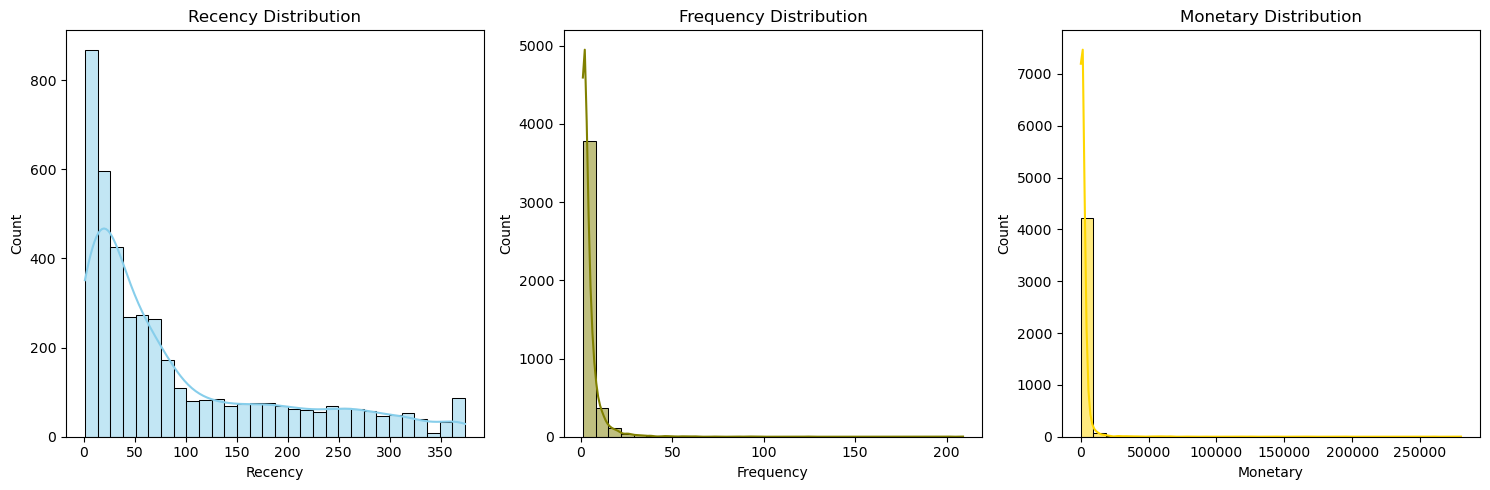

In [23]:
# Plot histograms for each RFM metric
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(rfm['Recency'], bins=30, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title('Recency Distribution')

sns.histplot(rfm['Frequency'], bins=30, kde=True, ax=axes[1], color="olive")
axes[1].set_title('Frequency Distribution')

sns.histplot(rfm['Monetary'], bins=30, kde=True, ax=axes[2], color="gold")
axes[2].set_title('Monetary Distribution')

plt.tight_layout()
plt.show()

✅ Task for Students: use box plot to plot the distribution of each the new features 

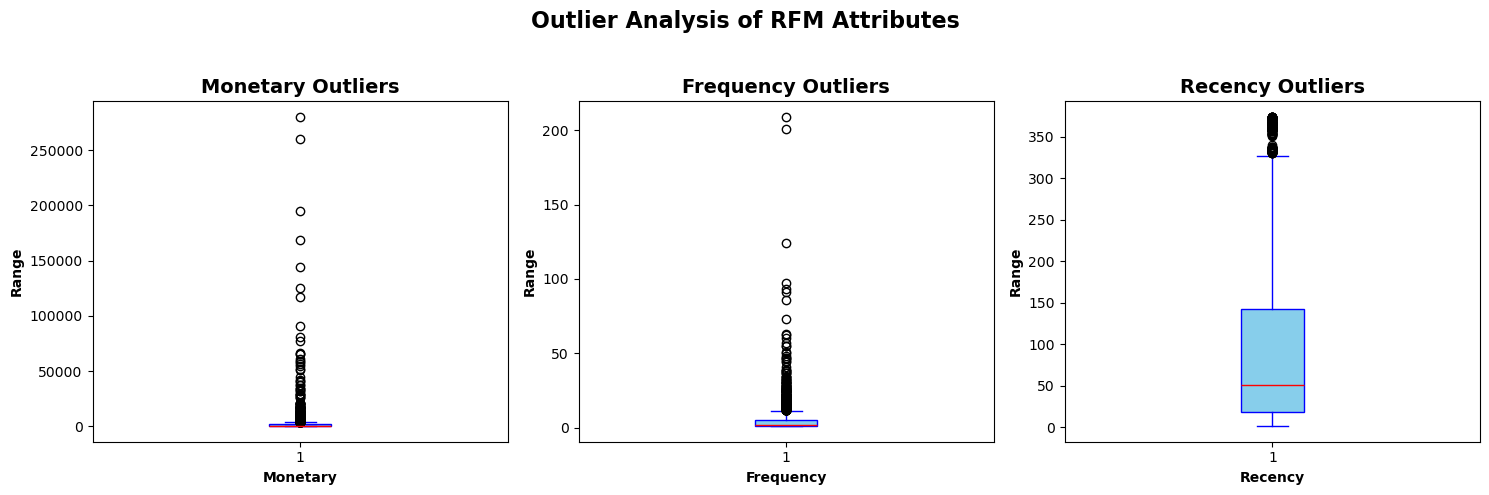

In [24]:
# Outlier Analysis of Amount, Frequency, and Recency
attributes = ['Monetary', 'Frequency', 'Recency']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each attribute in a separate subplot
for i, attr in enumerate(attributes):
    axes[i].boxplot(rfm[attr], vert=True, patch_artist=True, 
                    boxprops=dict(facecolor="skyblue", color="blue"),
                    medianprops=dict(color="red"),
                    whiskerprops=dict(color="blue"),
                    capprops=dict(color="blue"))
    
    # Set title and labels for each subplot
    axes[i].set_title(f"{attr} Outliers", fontsize=14, fontweight='bold')
    axes[i].set_ylabel("Range", fontweight='bold')
    axes[i].set_xlabel(attr, fontweight='bold')

# Adjust layout
plt.suptitle("Outlier Analysis of RFM Attributes", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Notice: An outlier: is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal.

✅ Task for students: Use the Interquartile Range (IQR) method to replace outliers. 

**The Interquartile Range (IQR) method** is a statistical approach to identify outliers in a dataset. It calculates the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data. Data points outside the "fence" defined by Q1 - 1.5xIQR and Q3 + 1.5xIQR are considered outliers.

In [25]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Monetary.quantile(0.25)
Q3 = rfm.Monetary.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Monetary >= Q1 - 1.5*IQR) & (rfm.Monetary <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.25)
Q3 = rfm.Recency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.25)
Q3 = rfm.Frequency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [26]:
rfm

,CustomerID,Recency,Frequency,Monetary
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
5,12352.0,36,8,2506.04
6,12353.0,204,1,89.00
...,...,...,...,...
4332,18278.0,74,1,173.90
4333,18280.0,278,1,180.60
4334,18281.0,181,1,80.82
4335,18282.0,8,2,178.05


### 5. Scaling Data for Clustering

✅ Task for students: use the standard scaler from Sklearn to scale the features

In [27]:
# Standardize the RFM metrics to improve clustering performance 
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Convert scaled data to DataFrame for easier handling
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

In [28]:
rfm_scaled_df.head()

,Recency,Frequency,Monetary
0,-0.233558,0.774967,1.270052
1,-0.821153,-0.868775,1.218016
2,2.232241,-0.868775,-0.647806
3,-0.642776,2.966623,2.199325
4,1.120008,-0.868775,-0.969538


### 6. Determining the Optimal Number of Clusters (Elbow Method)

✅ Task for students: Use the Elbow Method to find the optimal number of clusters.

C:\Users\ImranHossain\anaconda3\envs\DataMining\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(
C:\Users\ImranHossain\anaconda3\envs\DataMining\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(
C:\Users\ImranHossain\anaconda3\envs\DataMining\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(
C:\Users\ImranHossain\anaconda3\envs\DataMining\lib\site-package

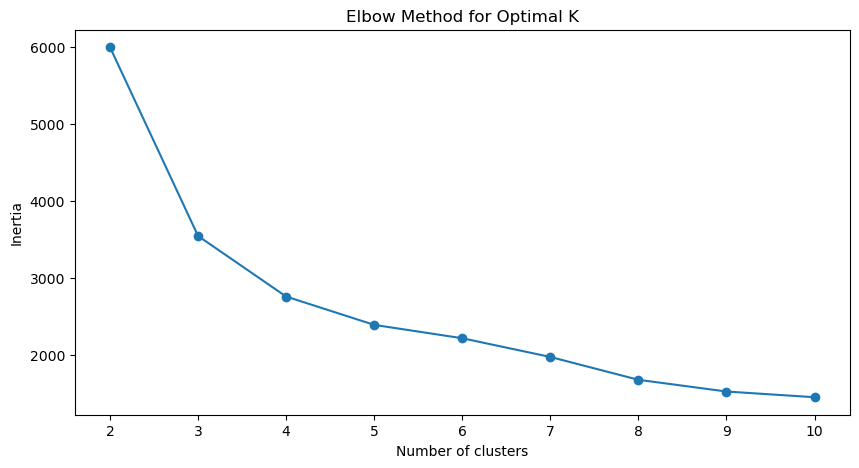

In [36]:
# Elbow Method to find the optimal number of clusters
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE)
    kmeans.fit(rfm_scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

### 7. Apply K-means Clustering

✅ Task for students: Using the chosen optimal `k` (e.g., 4), perform K-means clustering.

In [41]:
# Apply K-means with optimal number of clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=RANDOM_STATE)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled_df)

C:\Users\ImranHossain\anaconda3\envs\DataMining\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


In [42]:
# Preview clustered data
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
2,12348.0,75,4,1797.24,3
3,12349.0,19,1,1757.55,3
4,12350.0,310,1,334.40,2
5,12352.0,36,8,2506.04,0
6,12353.0,204,1,89.00,2


### 8. Cluster Insights and Interpretation
✅ Task for students: Interpret each cluster based on average **Recency**, **Frequency**, and **Monetary** average (mean) values across the clusters.
- find the mean value for each of the three variables for each cluster
- normalize this value by dividing it by maximum mean value across the different clusters: mean recency cluster 1/maximum mean of recency across all clusters

In [43]:
# Calculate average values per cluster
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': "mean",
    'Frequency': "mean",
    "Monetary": "mean"
}).round(2)
cluster_summary

,Recency,Frequency,Monetary
Cluster,,,
0,37.63,5.79,2340.17
1,54.33,1.51,411.25
2,243.73,1.42,393.69
3,47.73,3.70,1101.19


In [45]:
# normalize per feature. Otherwise, it is impossible to compare the clusters
cluster_summary = cluster_summary / cluster_summary.max(axis=0)

In [46]:
cluster_summary

,Recency,Frequency,Monetary
Cluster,,,
0,0.154392,1.000000,1.000000
1,0.222911,0.260794,0.175735
2,1.000000,0.245250,0.168231
3,0.195831,0.639033,0.470560


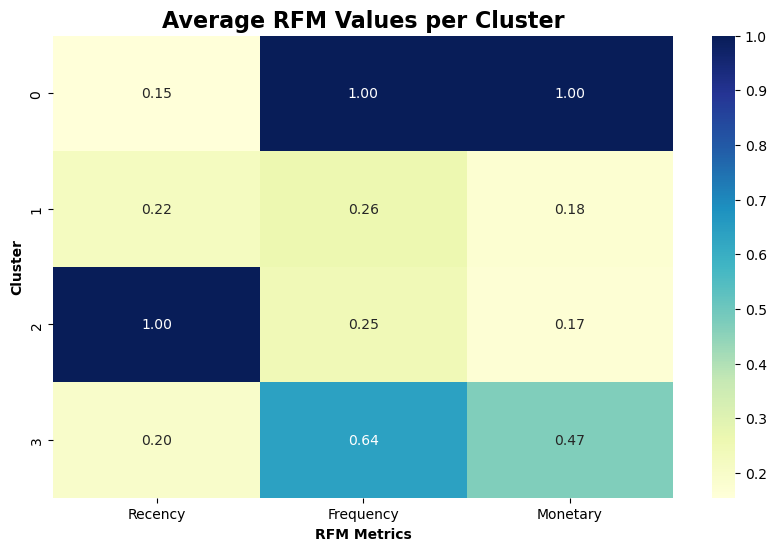

In [28]:
# Plot heatmap of cluster summary
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title("Average RFM Values per Cluster", fontsize=16, fontweight='bold')
plt.xlabel("RFM Metrics", fontweight='bold')
plt.ylabel("Cluster", fontweight='bold')
plt.show()


### 10. Conclusion and Recommendations

✅ Task for students: Discuss insights such as which customer segments are "high-value" or "at risk" of churning, and potential strategies to engage each segment.

# Conclusion and Recommendations

Based on the clustering results, we can interpret each segment and provide recommendations:

- **Cluster 1 (relatively medium Recency, medium/low Frequency, Low Monetary)**: Potential new customers or infrequent buyers who might be converted with special offers.

- **Cluster 0 (Low Recency, High Frequency, High Monetary)**: These are "loyal customers" who frequently purchase and spend the most; they should be rewarded.

- **Cluster 2 (High Recency, Low Frequency, Low Monetary)**: These may be "churned" customers who need re-engagement strategies.

- **Cluster 3 (Medium Recency, Medium Frequency, Medium Monetary)**: These customers could be targeted with personalized promotions to increase loyalty